## Objective

Comparative study of KNN and Decision tree for predicting Students Adaptability level in Online Education.

### Import libraries

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from graphviz import Source

### Read Data

In [ ]:
from google.colab import files
uploaded = files.upload()
import io
df = pd.read_csv(io.BytesIO(uploaded['faizastdadp.csv']))
# Dataset is now stored in a Pandas Dataframe
df.head()

Saving faizastdadp.csv to faizastdadp.csv


,Gender,Age,Education Level,Institution Type,IT Student,Location,Load-shedding,Financial Condition,Internet Type,Network Type,Class Duration,Self Lms,Device,Adaptivity Level
0,Boy,21-25,University,Non Government,No,Yes,Low,Mid,Wifi,4G,3-6,No,Tab,Moderate
1,Girl,21-25,University,Non Government,No,Yes,High,Mid,Mobile Data,4G,1-3,Yes,Mobile,Moderate
2,Girl,16-20,College,Government,No,Yes,Low,Mid,Wifi,4G,1-3,No,Mobile,Moderate
3,Girl,11-15,School,Non Government,No,Yes,Low,Mid,Mobile Data,4G,1-3,No,Mobile,Moderate
4,Girl,16-20,School,Non Government,No,Yes,Low,Poor,Mobile Data,3G,0,No,Mobile,Low


### Generate Data Profiling Report

The report will include information such as:

Overview of the dataset (number of variables, number of observations, missing values)
Summary statistics (mean, median, min, max, quantiles) for numerical variables
Distribution of numerical variables (histograms, density plots)
Cardinality and frequency of categorical variables
Correlation matrix
Missing values matrix
And much more

In [ ]:
pip install pandas-profiling


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 324.4/324.4 kB 5.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 357.9/357.9 kB 9.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.8/104.8 kB 11.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 686.1/686.1 kB 10.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 293.3/293.3 kB 10.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 10.7 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27080 sha256=234013837dad10edfe22bb85eeb1be1f898393c529fa593b2db245c1a124fd45
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Successfully built htmlmin
  Attempting uninstall: seaborn
    Found existing installation: seaborn 0.13.1
    Uninstalling seaborn-0.13.1:
      Successfully uninstalled seaborn-0.13.1


In [ ]:
pip install pydantic

In [ ]:
from pydantic import BaseModel

In [ ]:
import pydantic

In [ ]:
!apt-get -qq install -y graphviz && pip install pydot

In [ ]:
import pydot

In [ ]:
pip install pandas-profiling

In [ ]:
# https://pypi.python.org/pypi/libarchive
!apt-get -qq install -y libarchive-dev && pip install -U libarchive
#import libarchive

  Using cached libarchive-0.4.7.tar.gz (23 kB)
  Preparing metadata (setup.py) ... done
  Using cached nose-1.3.7-py3-none-any.whl (154 kB)
  error: subprocess-exited-with-error
  
  × python setup.py bdist_wheel did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for libarchive
  Running setup.py clean for libarchive
Failed to build libarchive
ERROR: Could not build wheels for libarchive, which is required to install pyproject.toml-based projects


In [ ]:
!pip install cartopy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 23.0 MB/s eta 0:00:00


In [ ]:
import cartopy

In [ ]:
# Load your dataset into a DataFrame
data = pd.read_csv("faizastdadp.csv")

# Generate the profile report
#profile = ProfileReport(data, title="Data Profiling Report")

# Save the report to an HTML file
#profile.to_file("data_profiling_report.html")


# Encoding

Choose a suitable encoding technique for the columns.

In [ ]:
df.shape

(1205, 14)

In [ ]:
df.dtypes

Gender                 object
Age                    object
Education Level        object
Institution Type       object
IT Student             object
Location               object
Load-shedding          object
Financial Condition    object
Internet Type          object
Network Type           object
Class Duration         object
Self Lms               object
Device                 object
Adaptivity Level       object
dtype: object

In [ ]:
df.isnull().sum()

Gender                 0
Age                    0
Education Level        0
Institution Type       0
IT Student             0
Location               0
Load-shedding          0
Financial Condition    0
Internet Type          0
Network Type           0
Class Duration         0
Self Lms               0
Device                 0
Adaptivity Level       0
dtype: int64

In [ ]:
df.describe()

,Gender,Age,Education Level,Institution Type,IT Student,Location,Load-shedding,Financial Condition,Internet Type,Network Type,Class Duration,Self Lms,Device,Adaptivity Level
count,1205,1205,1205,1205,1205,1205,1205,1205,1205,1205,1205,1205,1205,1205
unique,2,6,3,2,2,2,2,3,2,3,3,2,3,3
top,Boy,21-25,School,Non Government,No,Yes,Low,Mid,Mobile Data,4G,1-3,No,Mobile,Moderate
freq,663,374,530,823,901,935,1004,878,695,775,840,995,1013,625


### Check distribution

In [ ]:
df['Gender'].replace(['Boy','Girl'],[0,1],inplace=True)
df['Age'].replace(['2024','16-20', '21-25', '26-30'],[0,1,2,3],inplace=True)
df['Education Level'].replace(['School','College', 'University'],[0,1,2],inplace=True)
df['Institution Type'].replace(['Government','Non Government'],[0,1],inplace=True)
df['IT Student'].replace(['No','Yes'],[0,1],inplace=True)
df['Location'].replace(['No','Yes'],[0,1],inplace=True)
df['Load-shedding'].replace(['Low','High'],[0,1],inplace=True)
df['Financial Condition'].replace(['Poor','Mid', 'Rich'],[0,1,2],inplace=True)
df['Internet Type'].replace(['Mobile Data','Wifi'],[0,1],inplace=True)
df['Network Type'].replace(['2G','3G','4G'],[0,1,2],inplace=True)
df['Class Duration'].replace(['0','2024'],[0,1],inplace=True)
df['Self Lms'].replace(['No','Yes'],[0,1],inplace=True)
df['Device'].replace(['Tab','Computer','Mobile'],[0,1,2],inplace=True)
df['Adaptivity Level'].replace(['Low','Moderate','High'],[0,1,2],inplace=True)

In [ ]:
df.head()

,Gender,Age,Education Level,Institution Type,IT Student,Location,Load-shedding,Financial Condition,Internet Type,Network Type,Class Duration,Self Lms,Device,Adaptivity Level
0,0,2,2,1,0,1,0,1,1,2,3-6,0,0,1
1,1,2,2,1,0,1,1,1,0,2,1-3,1,2,1
2,1,1,1,0,0,1,0,1,1,2,1-3,0,2,1
3,1,11-15,0,1,0,1,0,1,0,2,1-3,0,2,1
4,1,1,0,1,0,1,0,0,0,1,0,0,2,0


In [ ]:
df.drop(['Age'],axis=1,inplace=True)

In [ ]:
df.drop(['Class Duration'],axis=1,inplace=True)

In [ ]:
df.head()

,Gender,Education Level,Institution Type,IT Student,Location,Load-shedding,Financial Condition,Internet Type,Network Type,Self Lms,Device,Adaptivity Level
0,0,2,1,0,1,0,1,1,2,0,0,1
1,1,2,1,0,1,1,1,0,2,1,2,1
2,1,1,0,0,1,0,1,1,2,0,2,1
3,1,0,1,0,1,0,1,0,2,0,2,1
4,1,0,1,0,1,0,0,0,1,0,2,0


In [ ]:
background_color = '#F8EDF4'
color_palette = ['#F78904', '#00C73C', '#D2125E', '#693AF9', '#B20600', '#007CDE', '#994936', '#886A00', '#39BBC2']

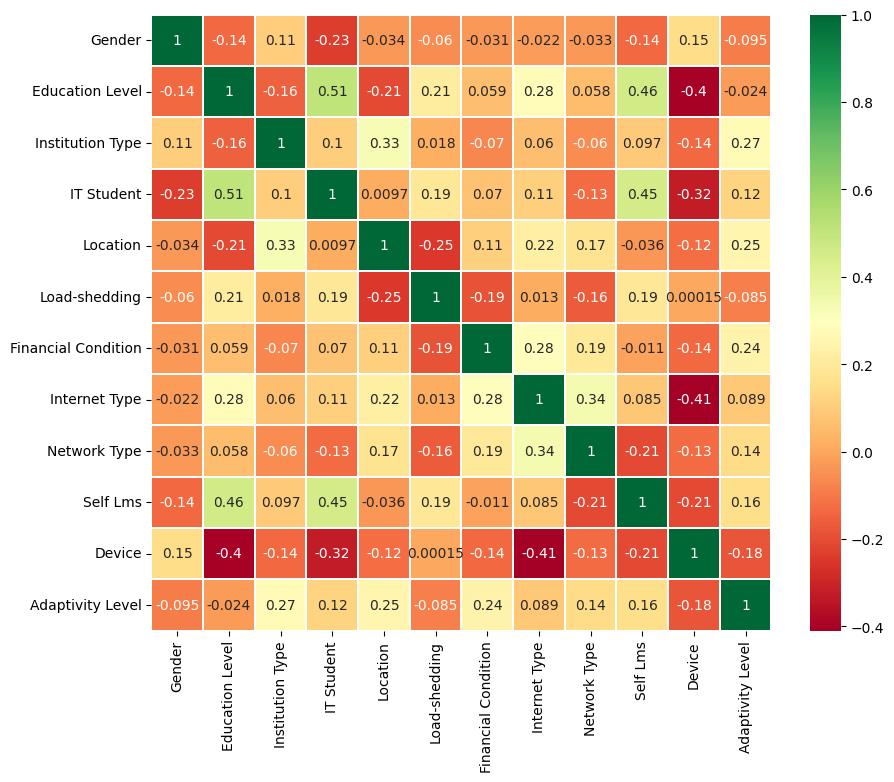

In [ ]:
sns.heatmap(df.corr(),annot=True,cmap='RdYlGn',linewidths=0.2) #data.corr()-->correlation matrix
fig=plt.gcf()
fig.set_size_inches(10,8)
plt.show()

<Axes: >

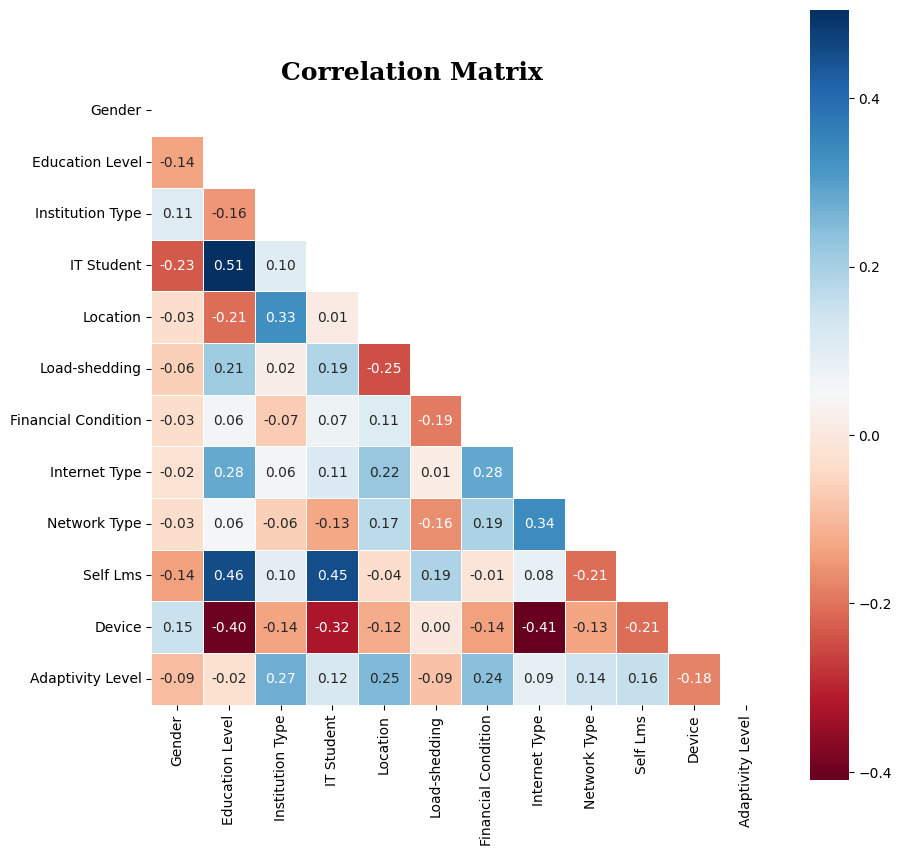

In [ ]:
f, ax = plt.subplots(1, 1, figsize=(10, 10))

mask = np.triu(np.ones_like(df.corr()))
ax.text(2.5, -0.1, 'Correlation Matrix', fontsize=18, fontweight='bold', fontfamily='serif')
sns.heatmap(df.corr(), annot=True, fmt='.2f', cmap='RdBu',
            square=True, mask=mask, linewidth=0.7, ax=ax)

# Machine Learning Algorithms

Use KNN and Decision tree and find which one is working better.

### Define X and Y

In [ ]:
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

### Train Test Split

In [ ]:
X = df.drop('Adaptivity Level', axis=1)
y = df['Adaptivity Level']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=0)

# KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [ ]:
knn = KNeighborsClassifier(n_neighbors=5)  # Initialize KNN classifier with 5 neighbors
knn.fit(X_train, y_train)  # Train the classifier on the training data


KNeighborsClassifier()

In [ ]:
y_pred = knn.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7261410788381742


#### Check different distance metric

**Euclidean**

In [ ]:
distances, indices = knn.kneighbors(X_test)
# Example: Compute the Euclidean distance between the first sample in X_test and its nearest neighbor
index = 0  # index of the sample in X_test
nearest_neighbor_index = indices[index, 0]  # index of the nearest neighbor
distance_to_nearest_neighbor = distances[index, 0]  # distance to the nearest neighbor
print("Euclidean distance to nearest neighbor:", distance_to_nearest_neighbor)

Euclidean distance to nearest neighbor: 0.0


**Manhattan**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# Assuming X_train, X_test, y_train, y_test are already defined

# Initialize and train the KNN classifier with Manhattan distance
knn_manhattan = KNeighborsClassifier(n_neighbors=5, metric='manhattan')
knn_manhattan.fit(X_train, y_train)

# Evaluate the performance
accuracy_manhattan = knn_manhattan.score(X_test, y_test)
print("Accuracy with Manhattan distance:", accuracy_manhattan)


Accuracy with Manhattan distance: 0.7302904564315352


# Decision Tree

**Using Entropy**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Assuming X_train, X_test, y_train, y_test are already defined

# Initialize the decision tree classifier with entropy
decision_tree_entropy = DecisionTreeClassifier(criterion='entropy', random_state=42)

# Train the decision tree classifier
decision_tree_entropy.fit(X_train, y_train)

# Make predictions on the testing set
y_pred_entropy = decision_tree_entropy.predict(X_test)

# Evaluate the performance
accuracy_entropy = accuracy_score(y_test, y_pred_entropy)
print("Accuracy with entropy criterion:", accuracy_entropy)


Accuracy with entropy criterion: 0.8547717842323651


**Use Gini Index**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Assuming X_train, X_test, y_train, y_test are already defined

# Initialize the decision tree classifier with Gini Index
decision_tree_gini = DecisionTreeClassifier(criterion='gini', random_state=42)

# Train the decision tree classifier
decision_tree_gini.fit(X_train, y_train)

# Make predictions on the testing set
y_pred_gini = decision_tree_gini.predict(X_test)

# Evaluate the performance
accuracy_gini = accuracy_score(y_test, y_pred_gini)
print("Accuracy with Gini Index criterion:", accuracy_gini)


Accuracy with Gini Index criterion: 0.8589211618257261


# Thank you and All the Best!